In [75]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Filter the DataFrame to include only 'Data Analyst' jobs in India
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')]

# Extract the month number from the 'job_posted_date' column
df_DA_US['job_posted_month_num'] = df_DA_US['job_posted_date'].dt.month

# Explode the 'job_skills' column (convert lists into separate rows)
df_DA_US_explode = df_DA_US.explode('job_skills')

# Create a pivot table with months as rows and skills as columns
# Count occurrences of each skill per month
df_pivot = df_DA_US_explode.pivot_table(
    index='job_posted_month_num',  # Rows (Months)
    columns='job_skills',          # Columns (Skills)
    aggfunc='size',                # Count occurrences
    fill_value=0                   # Replace NaN with 0
)

# Add a 'Total' row with the sum of each skill across all months
df_pivot.loc['Total'] = df_pivot.sum()

# Sort columns based on total occurrences of skills (descending order)
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]

# Drop the 'Total' row after sorting, as it's no longer needed
df_pivot = df_pivot.drop('Total')

# Display the final pivot table
df_pivot


C:\Users\Huawei\AppData\Local\Temp\ipykernel_952\1660867900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_US['job_posted_month_num'] = df_DA_US['job_posted_date'].dt.month


job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,0,0,0,1,0,0,0,0,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,1,0,0,0,0,0,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,1,0,0,0,0,0,1,0,0
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,1
7,245,161,174,124,93,67,78,39,31,31,...,0,0,0,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,1,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


In [89]:
total_data = df_DA_US.groupby('job_posted_month_num').size()
total_data

job_posted_month_num
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
dtype: int64

In [90]:
df_DA_US_percent = df_pivot.div(total_data/100, axis = 0)
df_DA_US_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.000000,0.000000,0.000000,0.159236,0.000000,0.0,0.000000,0.000000,0.00000
2,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
3,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.236967,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
4,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
5,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.359712,0.000000,0.000000,0.000000,0.000000,0.0,0.359712,0.000000,0.00000
6,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.27248
7,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
8,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.161812,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
9,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000


In [91]:
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_num'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_num')

df_DA_US_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.000000,0.000000,0.000000,0.159236,0.000000,0.0,0.000000,0.000000,0.00000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.236967,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.359712,0.000000,0.000000,0.000000,0.000000,0.0,0.359712,0.000000,0.00000
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.27248
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.161812,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000


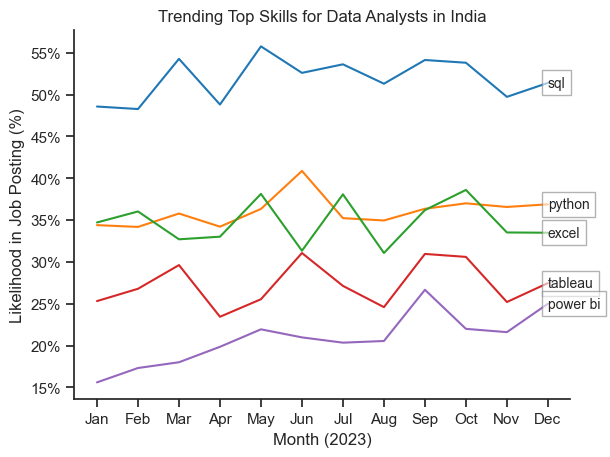

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Select the top 5 skills from the percentage data
df_plot = df_DA_US_percent.iloc[:, :5]

# Set Seaborn theme
sns.set_theme(style='ticks')

# Plot a line chart for the top 5 skills
sns.lineplot(data=df_plot, dashes=False, palette='tab10')

# Remove the default legend for a cleaner look
plt.legend().set_visible(False)

# Set plot title and labels
plt.title('Trending Top Skills for Data Analysts in India')
plt.xlabel('Month (2023)')
plt.ylabel('Likelihood in Job Posting (%)')

# Remove top and right border lines from the plot
sns.despine()

# Format the Y-axis to show whole numbers (percentages)
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Add text labels for the last recorded value of each skill
for i in range(5):
    plt.text(
        x=11,  # Fix: Ensure x-position matches the last month in the dataset
        y=df_plot.iloc[-1, i],  # Get the last value of each skill
        s=df_plot.columns[i],  # Display skill name
        fontsize=10,  # Adjust font size for better visibility
        ha='left',  # Align text to the left of the point
        va='center',  # Center vertically
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray')
    )

# Show the final plot
plt.show()

